<a href="https://colab.research.google.com/github/Prajyoti20/DeepLerning/blob/main/Regression_Keras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Regreetion With Keras**

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### step 1: Read the data

In [2]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv")
df.head(5)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [3]:
df.shape

(9568, 5)

# **Step2 : Perform Your basic quality cheaks**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [7]:
df.duplicated().sum()

41

In [8]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [9]:
df=df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


Seperate X and Y(PE)

In [10]:
X=df.drop(columns=['PE'])
Y=df[['PE']]

In [11]:
X.head(5)

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [12]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


Preprocess using x pipeline

In [13]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                             ('scale',StandardScaler())]).set_output(transform='pandas')

In [16]:
X_pre = num_pipe.fit_transform(X)

In [17]:
X_pre

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837
...,...,...,...,...
9563,-0.609648,-0.423583,-0.241925,-0.027724
9564,1.847362,1.864831,-0.494441,-0.932100
9565,-0.492776,-0.863450,0.162101,0.364561
9566,-0.269777,0.439598,0.899448,1.459261


# **Apply train test Split**

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [19]:
x_train

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499
...,...,...,...,...
5742,-0.109917,-1.064465,-1.356363,1.309330
5197,1.477937,1.535325,-1.701468,0.325538
5396,0.017702,-0.244640,-0.752007,1.464053
860,0.949996,1.146696,-0.418686,-0.445339


In [20]:
y_train

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71
...,...
5742,459.96
5197,430.00
5396,447.96
860,440.45


In [21]:
x_test

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599
...,...,...,...,...
3403,-2.138395,-1.505909,0.899448,1.746114
4214,0.240700,1.233408,-0.460772,0.604861
7085,0.962086,1.638591,-1.230104,-0.857477
2215,1.433606,1.266517,-1.097113,-0.207093


In [22]:
y_test

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47
...,...
3403,490.50
4214,443.31
7085,441.14
2215,438.47


In [23]:
x_test.shape

(1906, 4)

In [24]:
x_train.shape

(7621, 4)

In [25]:
x_train.shape[1]

4

**Step5: Build the neural network**

In [26]:
from keras.models import Sequential
from keras.layers import Dense,Input

In [27]:
#Initialize the model
model=Sequential()

#Add input layer
model.add(Input(shape=(x_train.shape[1],)))
#Add dense hidden layer 1
model.add(Dense(16,activation='relu'))
#Add dense hidden layer 2
model.add(Dense(8,activation='relu'))

# Add output layer
model.add(Dense(1,activation='linear'))



In [28]:
#Compile the model
model.compile(loss="mse",metrics=["mae"],optimizer="adam")

In [29]:
hist=model.fit(x_train,y_train,
          validation_data=(x_test,y_test),
          epochs=60)

Epoch 1/60
239/239 [==============================] - 7s 4ms/step - loss: 204575.4062 - mae: 451.9814 - val_loss: 199131.0469 - val_mae: 445.9020
Epoch 2/60
239/239 [==============================] - 1s 4ms/step - loss: 178299.8125 - mae: 421.1116 - val_loss: 146498.7500 - val_mae: 380.8698
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 104709.8906 - mae: 313.9911 - val_loss: 62748.6523 - val_mae: 234.4996
Epoch 4/60
239/239 [==============================] - 1s 4ms/step - loss: 40564.9648 - mae: 178.4307 - val_loss: 24862.5059 - val_mae: 134.6207
Epoch 5/60
239/239 [==============================] - 1s 4ms/step - loss: 20932.3359 - mae: 123.4972 - val_loss: 16888.3086 - val_mae: 110.9936
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 14809.9238 - mae: 103.8806 - val_loss: 12013.1748 - val_mae: 93.6875
Epoch 7/60
239/239 [==============================] - 1s 4ms/step - loss: 10222.6533 - mae: 86.1213 - val_loss: 7998.1670 - val_mae:

In [30]:
hist.history["loss"]

[204575.40625,
 178299.8125,
 104709.890625,
 40564.96484375,
 20932.3359375,
 14809.923828125,
 10222.6533203125,
 6568.74853515625,
 3890.95361328125,
 2178.345947265625,
 1258.18603515625,
 787.6602783203125,
 515.4950561523438,
 346.3875427246094,
 239.91824340820312,
 173.30905151367188,
 130.44381713867188,
 101.23976135253906,
 80.81193542480469,
 66.02278137207031,
 54.567657470703125,
 46.23788833618164,
 39.82501983642578,
 35.02316665649414,
 31.254581451416016,
 28.4454345703125,
 26.448287963867188,
 24.954818725585938,
 23.875301361083984,
 23.04581069946289,
 22.46250343322754,
 21.885501861572266,
 21.611108779907227,
 21.439002990722656,
 21.256967544555664,
 21.076766967773438,
 20.833478927612305,
 20.638425827026367,
 20.69516372680664,
 20.562885284423828,
 20.676389694213867,
 20.376644134521484,
 20.29151153564453,
 20.36989974975586,
 20.140899658203125,
 20.163137435913086,
 20.051742553710938,
 19.994857788085938,
 19.987823486328125,
 19.967071533203125,
 19.

In [31]:
hist.history["val_loss"]

[199131.046875,
 146498.75,
 62748.65234375,
 24862.505859375,
 16888.30859375,
 12013.1748046875,
 7998.1669921875,
 4899.1748046875,
 2760.637939453125,
 1524.97216796875,
 918.2395629882812,
 583.5418701171875,
 383.4357604980469,
 257.6945495605469,
 182.0580596923828,
 134.43246459960938,
 102.01675415039062,
 81.31550598144531,
 66.55338287353516,
 55.208824157714844,
 45.62101364135742,
 39.169071197509766,
 34.6012077331543,
 30.845369338989258,
 28.113554000854492,
 26.199962615966797,
 24.65410804748535,
 23.503170013427734,
 22.881128311157227,
 22.659242630004883,
 21.884815216064453,
 21.88405990600586,
 22.04854965209961,
 20.992313385009766,
 21.357194900512695,
 20.79079246520996,
 20.677400588989258,
 21.445772171020508,
 20.753944396972656,
 20.424884796142578,
 20.890586853027344,
 20.337726593017578,
 20.257278442382812,
 20.328306198120117,
 20.43337059020996,
 20.5963077545166,
 20.46845245361328,
 20.078462600708008,
 20.214046478271484,
 19.836177825927734,
 20.

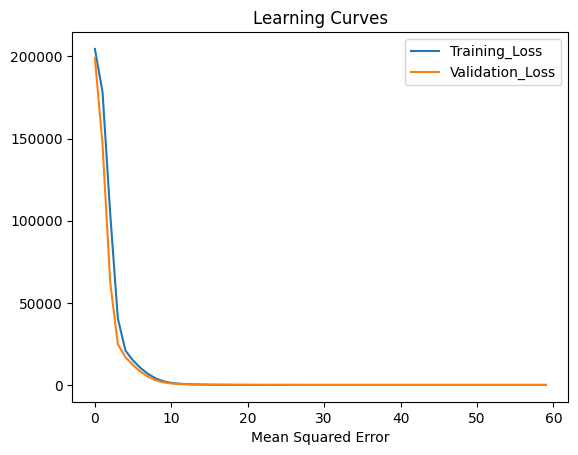

In [34]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"],label="Training_Loss")
plt.plot(hist.history["val_loss"],label="Validation_Loss")
plt.xlabel("Number of Epochas")
plt.xlabel("Mean Squared Error")
plt.title("Learning Curves")
plt.legend()
plt.show()

In [35]:
model.evaluate(x_train,y_train)

239/239 [==============================] - 1s 4ms/step - loss: 19.5891 - mae: 3.4755


[19.58909797668457, 3.475456476211548]

In [36]:
model.evaluate(x_test,y_test)

60/60 [==============================] - 0s 4ms/step - loss: 19.5874 - mae: 3.4972


[19.587398529052734, 3.497150421142578]